In [3]:

import kagglehub
from kagglehub import KaggleDatasetAdapter
import pandas as pd

# Set the path to the file you'd like to load
file_path = "fake_bills.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "alexandrepetit881234/fake-bills",
  file_path,

  pandas_kwargs={'sep': ';'}
)

print("First 5 records:", df.head())

/tmp/ipython-input-2979857790.py:9: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


First 5 records:    is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0        True    171.81       104.86        104.95        4.52       2.89   
1        True    171.46       103.36        103.66        3.77       2.99   
2        True    172.69       104.48        103.50        4.40       2.94   
3        True    171.36       103.91        103.94        3.62       3.01   
4        True    171.73       104.28        103.46        4.04       3.48   

   length  
0  112.83  
1  113.09  
2  113.16  
3  113.51  
4  112.54  


In [4]:
X = df.drop('is_genuine', axis=1)
y = df['is_genuine']

print("First 5 rows of X:")
display(X.head())

print("\nFirst 5 rows of y:")
display(y.head())

First 5 rows of X:


,diagonal,height_left,height_right,margin_low,margin_up,length
0,171.81,104.86,104.95,4.52,2.89,112.83
1,171.46,103.36,103.66,3.77,2.99,113.09
2,172.69,104.48,103.50,4.40,2.94,113.16
3,171.36,103.91,103.94,3.62,3.01,113.51
4,171.73,104.28,103.46,4.04,3.48,112.54



First 5 rows of y:


,is_genuine
0,True
1,True
2,True
3,True
4,True


## Split the data


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (1200, 6)
Shape of X_test: (300, 6)
Shape of y_train: (1200,)
Shape of y_test: (300,)


## Train the knn model




In [7]:
from sklearn.impute import SimpleImputer
import numpy as np

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_imputed, y_train)

KNeighborsClassifier()

## Evaluate the model



In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = knn.predict(X_test_imputed)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

Accuracy: 0.9866666666666667
Precision: 0.979381443298969
Recall: 1.0
F1-score: 0.9895833333333334


# Task
Perform relevant visualizations on the "alexandrepetit881234/fake-bills" dataset after loading it and performing KNN analysis.

## Visualize feature distributions

### Subtask:
Create visualizations (e.g., histograms, box plots) to understand the distribution of each feature in the dataset.


**Reasoning**:
Import the necessary libraries for plotting and iterate through the features to create histograms and box plots for each, visualizing their distributions.



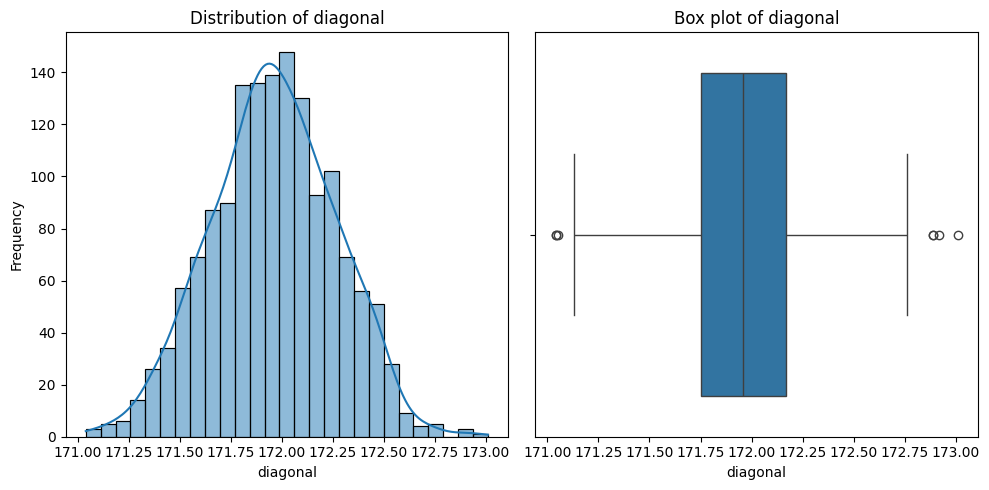

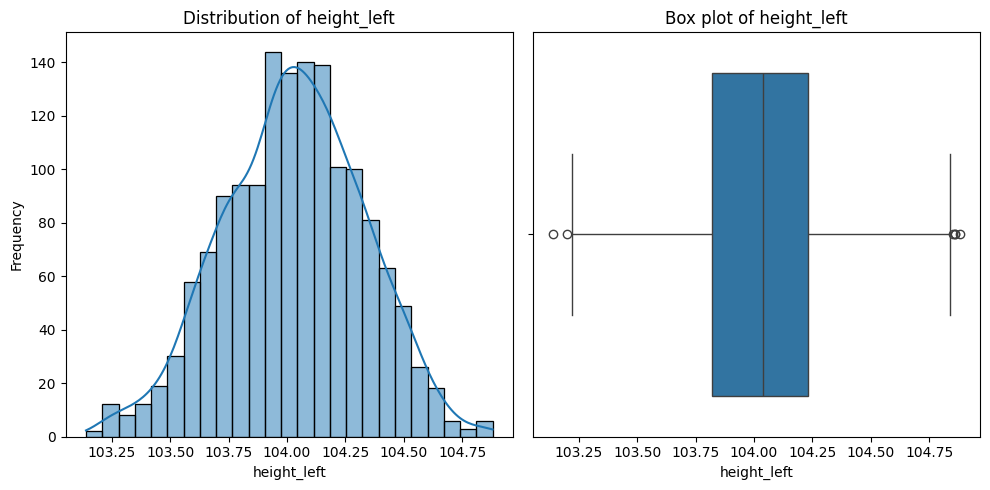

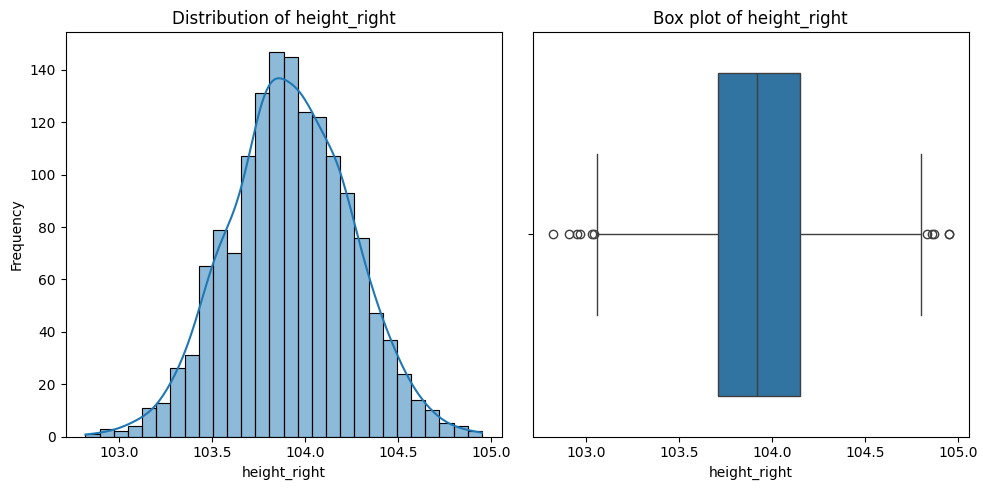

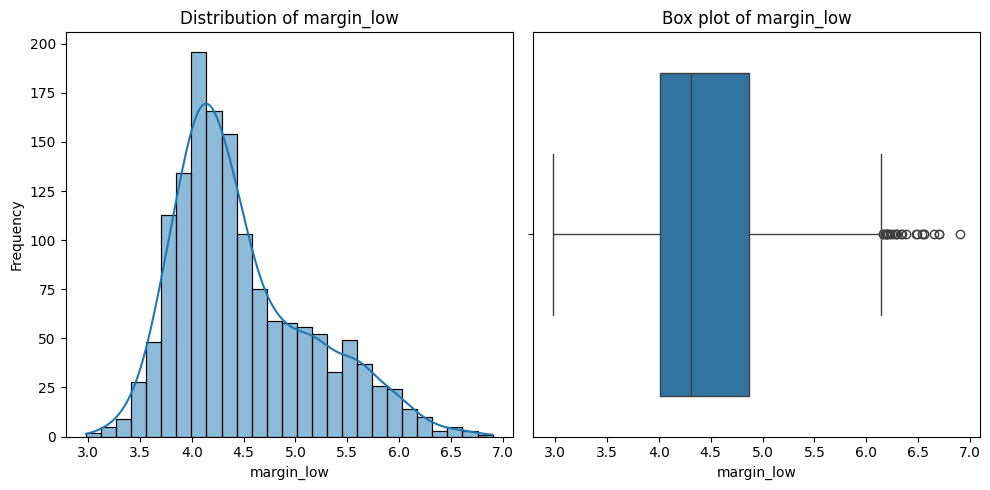

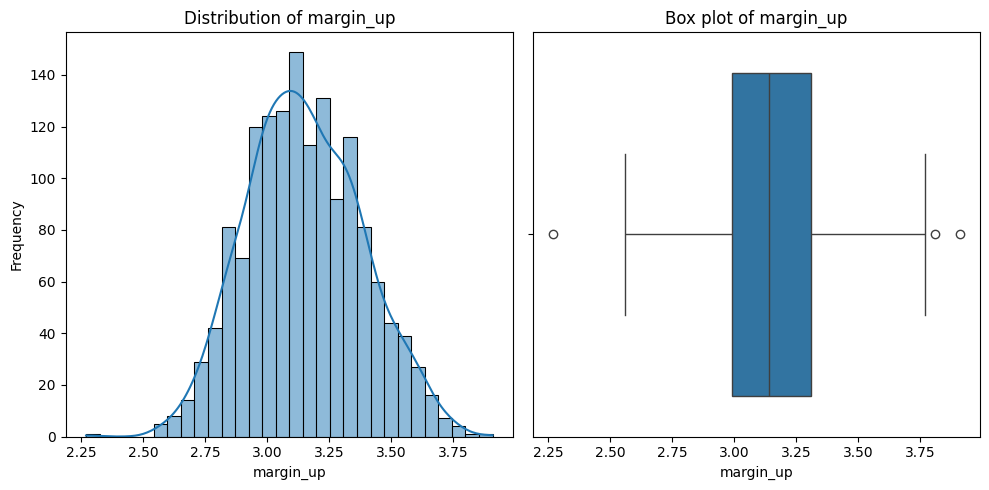

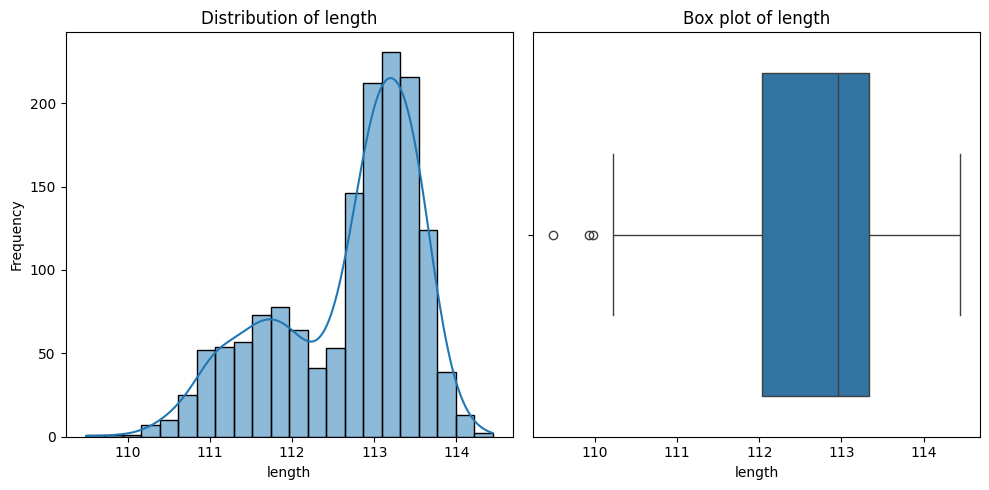

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

for column in X.columns:
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    sns.histplot(data=X, x=column, kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

    plt.subplot(1, 2, 2)
    sns.boxplot(data=X, x=column)
    plt.title(f'Box plot of {column}')
    plt.xlabel(column)

    plt.tight_layout()
    plt.show()

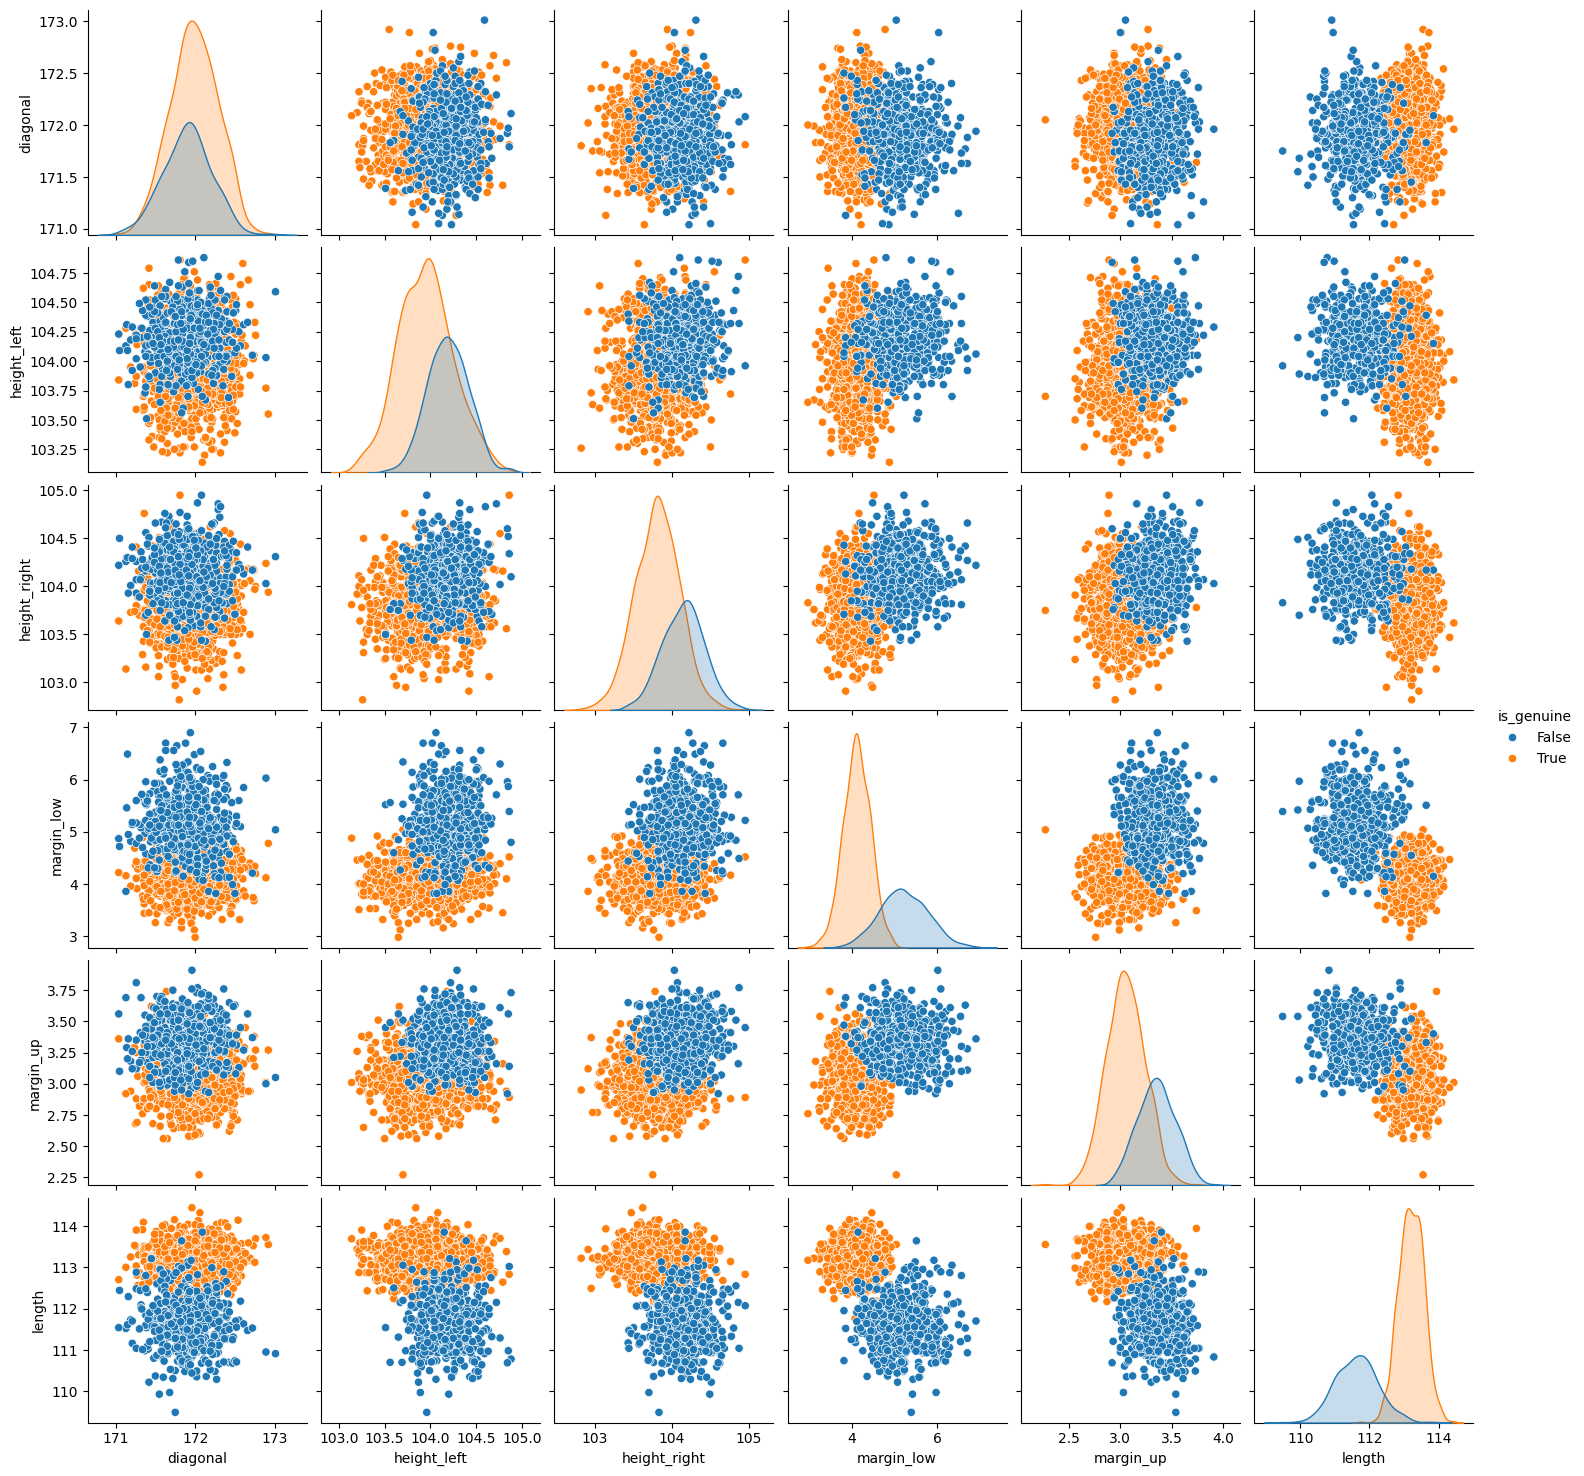

In [10]:
sns.pairplot(df, hue='is_genuine')
plt.show()

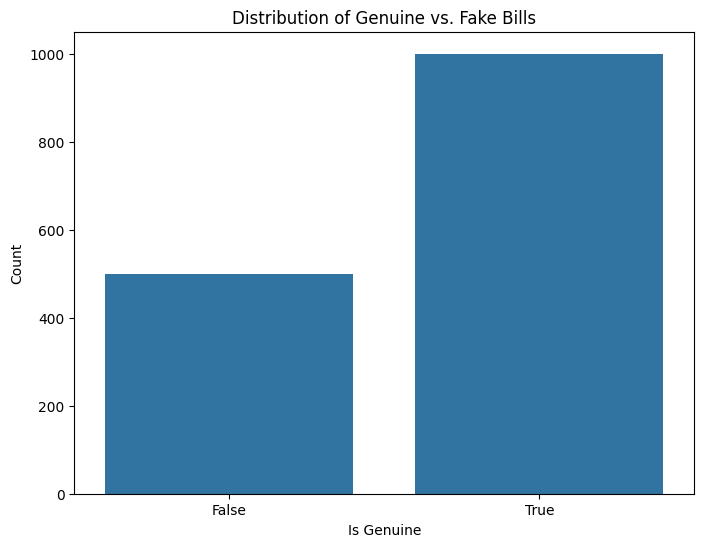

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='is_genuine')
plt.title('Distribution of Genuine vs. Fake Bills')
plt.xlabel('Is Genuine')
plt.ylabel('Count')
plt.show()